<a href="https://colab.research.google.com/github/vdnghia03/Deep-Learning/blob/main/DL3_CNN_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
##  Convolutional Neural Networks (CNN)
---

Read more:

- [Convolutional neural networks - wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network)
- [Conv2D layer - keras](https://keras.io/api/layers/convolution_layers/convolution2d/)
- [CNN for visual recognition - CS231](https://cs231n.github.io/convolutional-networks/)
- [CIFAR10 - Krizhevsky et. al.](https://www.cs.toronto.edu/~kriz/cifar.html)

In [30]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data

(X_train, y_train), (X_test, y_test) = load_data()
y_train, y_test = y_train.ravel(), y_test.ravel()
# .ravel() là một phương thức của NumPy array,
# được sử dụng để "làm phẳng" (flatten)
# một mảng đa chiều thành một mảng một chiều.

In [31]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i : label for i, label in enumerate(labels)}

In [32]:
labels_dict

print(f"{X_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(50000, 32, 32, 3)
X_test.shape=(10000, 32, 32, 3)
y_train.shape=(50000,)
y_test.shape=(10000,)


In [33]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

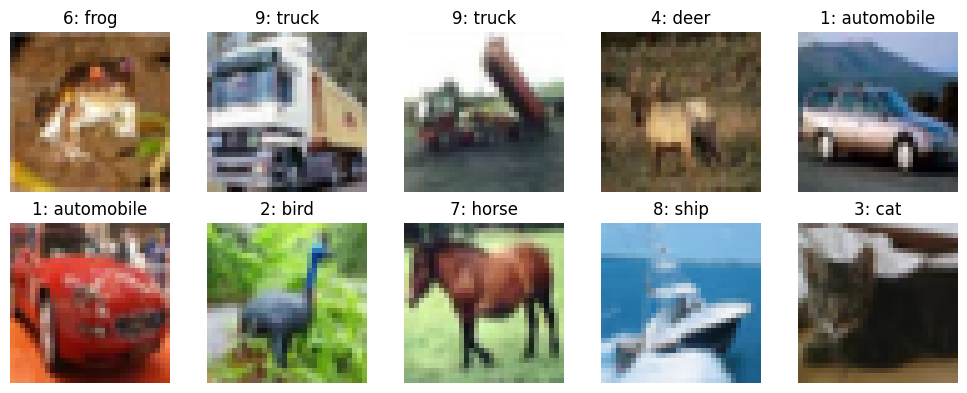

In [6]:
# Draw label
fig, axes = plt.subplots( 2, 5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(X_train[i])
  ax.axis("off")
  ax.set_title(f"{y_train[i]}: {labels_dict[y_train[i]]}")
fig.tight_layout()

#### Scaler


In [7]:
print(f"{X_train.min()=}, {X_train.max()=}")
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255

X_train.min()=np.uint8(0), X_train.max()=np.uint8(255)


In [8]:
scaled_X_train[0][0].shape

(32, 3)

---
### CNN model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

def CNN_model(learning_rate = 0.001, drop_rate=0.5, kernels=[32,64]):
  print(drop_rate)
  # default learning rate in Adam
  adam = Adam(learning_rate=learning_rate)
  model = Sequential(name="CNN_model")

  for number_kernel in kernels:
    conv_layer = Conv2D(
        filters = number_kernel
        , kernel_size = (3,3)
        , activation = "relu"
        , kernel_initializer = "he_normal"
        , input_shape = X_train.shape[1:],
    )
    model.add(conv_layer)
    model.add(MaxPooling2D(pool_size=(2,2), strides = 2))

  model.add(Flatten())
  model.add(Dropout(drop_rate))
  model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
  model.add(Dense(10, activation="softmax"))

  model.compile(
      loss="sparse_categorical_crossentropy"
      , optimizer=adam
      , metrics=["accuracy"])

  return model

model = CNN_model(0.001, 0.5, [32,64,32])
model.summary()


0.5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard


early_stopper = EarlyStopping(
    monitor = "val_loss"
    , mode = "min"
    , patience = 15
)

model.fit(
    scaled_X_train
    , y_train
    , epochs = 100
    , callbacks = [early_stopper]
    , validation_split = 1/5
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2395 - loss: 2.0006 - val_accuracy: 0.4755 - val_loss: 1.4312
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4448 - loss: 1.5093 - val_accuracy: 0.5422 - val_loss: 1.2676
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5043 - loss: 1.3630 - val_accuracy: 0.5752 - val_loss: 1.1912
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5388 - loss: 1.2793 - val_accuracy: 0.5975 - val_loss: 1.1565
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5601 - loss: 1.2173 - val_accuracy: 0.6106 - val_loss: 1.0939
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5782 - loss: 1.1700 - val_accuracy: 0.6336 - val_loss: 1.0490
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5988 - loss: 1.1170 - val_accuracy: 0.6384 - val_loss: 1.0336
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6011 - loss

In [11]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.321900,1.798584,0.4755,1.431195
1,0.460250,1.468274,0.5422,1.267612
2,0.511225,1.351307,0.5752,1.191208
3,0.540975,1.270245,0.5975,1.156507
4,0.558875,1.216193,0.6106,1.093897


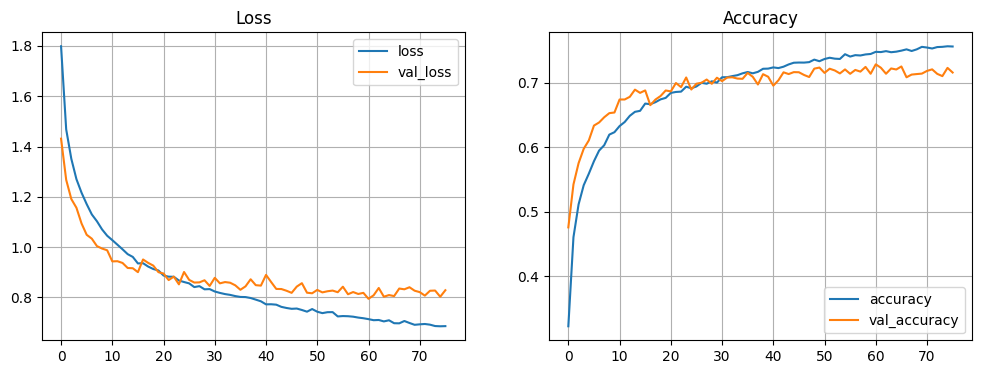

In [12]:
def plot_metrics(metrics):
  fig, axes = plt.subplots(1,2,figsize=(12,4))
  metrics[["loss", "val_loss"]].plot(ax=axes[0], title="Loss", grid=True)
  metrics[["accuracy", "val_accuracy"]].plot(ax=axes[1], title="Accuracy", grid=True)

plot_metrics(metrics)

### Hyperparameter tuning

We can tune several parmeters:
- dropout rate
- learning rate
- different network configuration

For simplicity we only tune dropout rate here

In [17]:
early_stopper = EarlyStopping(monitor="val_loss", mode = "min", patience=5,restore_best_weights=True)

def evaluate_model(**kwargs):

  model = CNN_model(**kwargs)
  model.fit(
      scaled_X_train
      , y_train
      , epochs = 15
      , callbacks = [early_stopper]
      , validation_split = 1/6
  )

  metrics = pd.DataFrame(model.history.history)
  val_acc = metrics["val_accuracy"].iloc[-1]
  return val_acc

In [18]:
dropout_accuracies = {}
for drop_rate in np.arange(.1, .6, .1):
    drop_rate = np.round(drop_rate,1)
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate = drop_rate)

0.1
Epoch 1/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.4090 - loss: 1.6536 - val_accuracy: 0.6106 - val_loss: 1.1061
Epoch 2/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6310 - loss: 1.0445 - val_accuracy: 0.6500 - val_loss: 1.0067
Epoch 3/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6969 - loss: 0.8680 - val_accuracy: 0.6784 - val_loss: 0.9322
Epoch 4/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7482 - loss: 0.7227 - val_accuracy: 0.6977 - val_loss: 0.8719
Epoch 5/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7918 - loss: 0.5948 - val_accuracy: 0.7060 - val_loss: 0.8851
Epoch 6/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8322 - loss: 0.4867 - val_accuracy: 0.7015 - val_loss: 0.9415
Epoch 7/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8673 - loss: 0.3839 - val_accuracy: 0.7133 - val_loss: 0.9395
Epoch 8/15
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8926 - loss: 0

<Axes: title={'center': 'Tuning dropouts'}, xlabel='Dropouts', ylabel='Validation accuracy'>

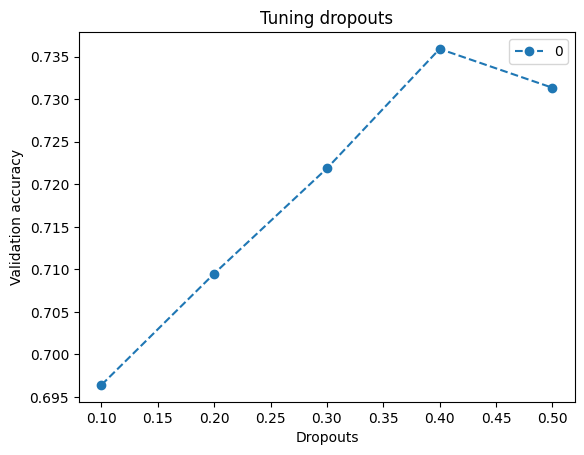

In [19]:

pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title="Tuning dropouts", xlabel="Dropouts", ylabel="Validation accuracy", style = "--o"
)


### Train and evaluate on chosen model

In [36]:
# note that we can't use early stopping here as we will train on all training data and no validation
# don't use test data as validation data here

model_final = CNN_model(drop_rate = .4)

model_final.fit(scaled_X_train, y_train, epochs = 20)

0.4


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4115 - loss: 1.6412
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6116 - loss: 1.1036
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6732 - loss: 0.9320
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7145 - loss: 0.8213
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7401 - loss: 0.7354
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7704 - loss: 0.6562
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7909 - loss: 0.5968
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8077 - loss: 0.5486
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8272 - loss: 0.4960
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8445 - loss: 0.4420
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8540 - loss: 0.4214
Epoch 12/20
1563/1563 ━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1000
           1       0.86      0.84      0.85      1000
           2       0.68      0.62      0.64      1000
           3       0.54      0.54      0.54      1000
           4       0.66      0.72      0.69      1000
           5       0.63      0.65      0.64      1000
           6       0.78      0.82      0.80      1000
           7       0.76      0.78      0.77      1000
           8       0.84      0.81      0.82      1000
           9       0.83      0.79      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



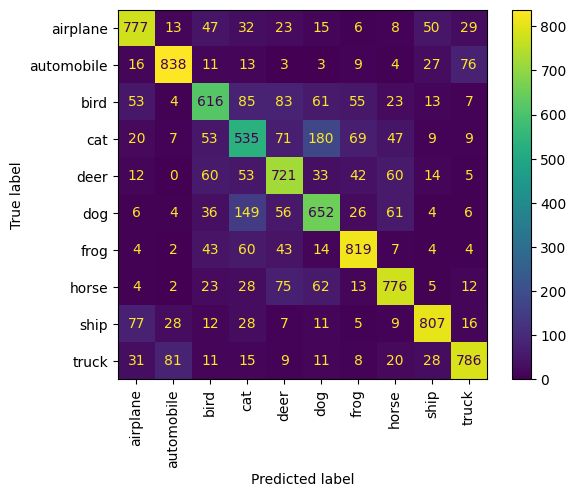

In [37]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = model_final.predict(scaled_X_test)
#y_pred = np.argmax(y_pred)

y_pred = np.argmax(y_pred, axis = 1)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xticks(rotation = 90);